<a href="https://colab.research.google.com/github/jbeen2/Today-I-Learned/blob/main/2020-2-DataAnalysis-II/1209_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import sys
import pickle
import joblib
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd 
import numpy as np

from IPython.display import display
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
pd.set_option('display.max_info_columns', 200)

In [3]:
# visualize
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

# Data Load
* 출처 : https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity  
* Instance : 39644개, attribute : 61개      



* Mashable (https://mashable.com/) 에 2년 동안 게시된 article의 통계량을 낸 데이터 
* Goal : 소셜 네트워크의 공유 수 (Popularity) 예측 

***

### 변수 목록 
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. **shares: Number of shares (target)**


In [4]:
cd /content/drive/MyDrive/Stat/2020-2-DataAnalysis

/content/drive/MyDrive/Stat/2020-2-DataAnalysis


In [66]:
data = pd.read_csv("OnlineNewsPopularity.csv")
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [28]:
# data type 체크 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [9]:
# 결측값 체크
data.isnull().sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

In [10]:
# 데이터 분포 
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

# Data Preprocessing

1. train/test split 전, 영향을 주지 않으면서 공통적으로 적용할 수 있는 부분의 경우 전체 데이터셋에 함께 전처리를 수행하였습니다. 

In [29]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [67]:
# 모든 칼럼명 앞에 공백이 존재하므로, 이를 제거해 주었습니다. 
data.columns = [columns.strip() for columns in list(data.columns)]

In [31]:
import datetime 
datetime.timedelta(data.timedelta[0])

datetime.timedelta(731)

In [68]:
# timedelta의 형식이 제대로 되어 있지 않으므로, drop 하였습니다.  
data = data.drop(['timedelta'], axis=1)

In [33]:
# 대신 url feature에서 시간에 해당하는 파생변수를 생성하였습니다. 
data.url[0].split('/')

['http:',
 '',
 'mashable.com',
 '2013',
 '01',
 '07',
 'amazon-instant-video-browser',
 '']

In [69]:
# url : http://mashable.com/2013/01/07/amazon-instant-video-browser/ 형태로 구성되어 있습니다. 
# 기사 작성년도, 월, 일, 기사제목 파생변수를 생성했습니다. 

data["year"] = data["url"].apply(lambda x : x.split('/')[3])
data["month"] = data["url"].apply(lambda x : x.split('/')[4])
data["day"] = data["url"].apply(lambda x : x.split('/')[5])
data["title"] = data["url"].apply(lambda x : x.split('/')[6])

In [70]:
# 기사의 제목에서 추출해 낼 수 있는 통계량에 대한 파생변수를 생성했습니다. 


# ex. digg-new-app-monetization
# 기사 제목의 단어의 수 : 4 
data["title_word_count"] = data["title"].apply(lambda x : len(x.split('-')))

# 기사 제목에서 가장 짧은 단어의 길이 : 3 (new) 
data["title_word_shortest"] = data["title"].apply(lambda x : min([len(word) for word in x.split('-')]))

# 기사 제목에서 가장 긴 단어의 길이 : 12 (monetization)
data["title_word_longest"] = data["title"].apply(lambda x : max([len(word) for word in x.split('-')]))

# 기사 제목 단어의 평균 길이 : 5.5
data["title_word_mean"] = data["title"].apply(lambda x : np.mean([len(word) for word in x.split('-')]))

# 기사 제목의 총 길이 : 25 
data["title_word_length"] = data["title"].apply(lambda x : len(''.join(x)))

In [71]:
# 대부분의 경우 기사 제목 첫 시작이 '기업'인 경우가 많았어서, 이에 대한 변수를 생성해 보았습니다. 
data["title_first_word"] = data["title"].apply(lambda x : x.split('-')[0])

In [72]:
# url, title은 object 형태이기 때문에, 이를 제거했습니다. 
data = data.drop(['url', 'title'], axis=1)

In [73]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,year,month,day,title_word_count,title_word_shortest,title_word_longest,title_word_mean,title_word_length,title_first_word
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2013,01,07,4,5,7,6.25,28,amazon
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2013,01,07,4,2,9,6.00,27,ap
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2013,01,07,5,2,9,5.20,30,apple
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2013,01,07,4,3,9,5.25,24,astronaut
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,2013,01,07,4,1,5,3.25,16,att


In [79]:
# 가장 처음에 나타나는 단어들의 분포를 살펴보았습니다. 
# google, facebook, apple, twitter 등의 단어가 많이 나옴을 볼 수 있습니다. 

data.title_first_word.value_counts()[:50]

google        957
facebook      737
apple         723
twitter       530
the           338
samsung       330
new           283
amazon        254
microsoft     233
social        223
iphone        201
obama         197
world         193
game          188
nasa          171
instagram     162
top           160
youtube       155
how           153
yahoo         146
star          145
sony          143
best          137
vine          129
3d            114
ukraine       112
netflix       112
digital       105
5             103
super         102
tech          100
viral          95
blackberry     95
lg             91
reddit         91
bill           89
ios            88
ebola          86
nsa            86
jimmy          85
nba            85
ipad           85
nfl            82
linkedin       81
first          80
disney         80
uber           79
job            78
lego           77
internet       76
Name: title_first_word, dtype: int64

In [105]:
# 따라서 자주 빈출되는 단어에 속하면 해당 단어를 keep 하고, 
# 자주 빈출되지 않는 단어의 경우 "others" 로 바꾸어 주었습니다. 

titlelist = [title for title, freq in data.title_first_word.value_counts()[:50].items()]

In [102]:
def popular_title(title, title_list) : 
    if title in title_list : 
        return title 
    else : 
        return "Others"

In [106]:
data["title_onehot"] = data.apply(lambda x : popular_title(x["title_first_word"], titlelist), axis=1)
data = data.drop(["title_first_word"], axis=1)

In [107]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,year,month,day,title_word_count,title_word_shortest,title_word_longest,title_word_mean,title_word_length,title_onehot
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2013,01,07,4,5,7,6.25,28,amazon
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2013,01,07,4,2,9,6.00,27,Others
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2013,01,07,5,2,9,5.20,30,apple
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2013,01,07,4,3,9,5.25,24,Others
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,2013,01,07,4,1,5,3.25,16,Others


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  float64
 1   n_tokens_content               39644 non-null  float64
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  float64
 6   num_self_hrefs                 39644 non-null  float64
 7   num_imgs                       39644 non-null  float64
 8   num_videos                     39644 non-null  float64
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  float64
 11  data_channel_is_lifestyle      39644 non-null  float64
 12  data_channel_is_entertainment  39644 non-null 

In [109]:
data.year.value_counts()

2014    21445
2013    18199
Name: year, dtype: int64

In [112]:
data.shape

(39644, 68)

In [117]:
# object 변수의 경우 one-hot encoding 처리 해 주었습니다. 
# year(2013, 2014년), month, day, title_onehot 

data = pd.get_dummies(data)

In [119]:
print("final dataset shape : ", data.shape) 
data.head()

final dataset shape :  (39644, 160)


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,title_word_count,title_word_shortest,title_word_longest,title_word_mean,title_word_length,year_2013,year_2014,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,day_01,day_02,day_03,day_04,day_05,day_06,day_07,day_08,day_09,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,title_onehot_3d,title_onehot_5,title_onehot_Others,title_onehot_amazon,title_onehot_apple,title_onehot_best,title_onehot_bill,title_onehot_blackberry,title_onehot_digital,title_onehot_disney,title_onehot_ebola,title_onehot_facebook,title_onehot_first,title_onehot_game,title_onehot_google,title_onehot_how,title_onehot_instagram,title_onehot_internet,title_onehot_ios,title_onehot_ipad,title_onehot_iphone,title_onehot_jimmy,title_onehot_job,title_onehot_lego,title_onehot_lg,title_onehot_linkedin,title_onehot_microsoft,title_onehot_nasa,title_onehot_nba,title_onehot_netflix,title_onehot_new,title_onehot_nfl,title_onehot_nsa,title_onehot_obama,title_onehot_reddit,title_onehot_samsung,title_onehot_social,title_onehot_sony,title_onehot_star,title_onehot_super,title_onehot_tech,title_onehot_the,title_onehot_top,title_onehot_twitter,title_onehot_uber,title_onehot_ukraine,title_onehot_vine,title_onehot_viral,title_onehot_world,title_onehot_yahoo,title_onehot_youtube
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,4,5,7,6.25,28,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,4,2,9,6.00,27,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,5,2,9,5.20,30,1,0,1,0,0,0,0,0,0,0,0,0,0,0,

2. 데이터가 하나로 구성되어 있으므로, 분석 시작 전 train과 test로 나누었습니다. 

In [120]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=2020)

In [121]:
train.shape, test.shape

((31715, 160), (7929, 160))

# EDA

## 1. Target Distribution 

In [122]:
# target variable : shares 설정 
X = train.drop(["shares"], axis=1)
y = train.shares

print(X.shape, y.shape)

(31715, 159) (31715,)


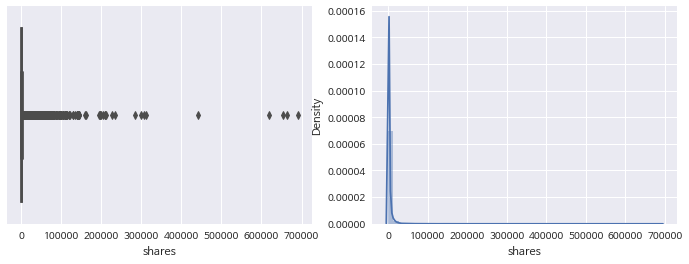

In [123]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(y, ax=ax1)
sns.distplot(y, ax=ax2)

In [125]:
# shares가 특히 많이 된 5개의 데이터 
train.sort_values("shares", ascending=False).head(5)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,title_word_count,title_word_shortest,title_word_longest,title_word_mean,title_word_length,year_2013,year_2014,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,day_01,day_02,day_03,day_04,day_05,day_06,day_07,day_08,day_09,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,title_onehot_3d,title_onehot_5,title_onehot_Others,title_onehot_amazon,title_onehot_apple,title_onehot_best,title_onehot_bill,title_onehot_blackberry,title_onehot_digital,title_onehot_disney,title_onehot_ebola,title_onehot_facebook,title_onehot_first,title_onehot_game,title_onehot_google,title_onehot_how,title_onehot_instagram,title_onehot_internet,title_onehot_ios,title_onehot_ipad,title_onehot_iphone,title_onehot_jimmy,title_onehot_job,title_onehot_lego,title_onehot_lg,title_onehot_linkedin,title_onehot_microsoft,title_onehot_nasa,title_onehot_nba,title_onehot_netflix,title_onehot_new,title_onehot_nfl,title_onehot_nsa,title_onehot_obama,title_onehot_reddit,title_onehot_samsung,title_onehot_social,title_onehot_sony,title_onehot_star,title_onehot_super,title_onehot_tech,title_onehot_the,title_onehot_top,title_onehot_twitter,title_onehot_uber,title_onehot_ukraine,title_onehot_vine,title_onehot_viral,title_onehot_world,title_onehot_yahoo,title_onehot_youtube
5370,11.0,893.0,0.517202,1.0,0.716730,17.0,11.0,0.0,11.0,4.586786,6.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,10100.0,1937.666667,10100.0,617900.0,280433.333333,2874.870600,10100.000000,5083.768906,705.0,17300.0,5099.111111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.701874,0.033383,0.033334,0.198075,0.033333,0.450678,0.100533,0.047032,0.024636,0.656250,0.343750,0.421230,0.033333,1.0,-0.348674,-1.000000,-0.10,0.000000,0.000000,0.500000,0.000000,690400,4,2,8,5.00,23,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23237,13.0,2591.0,0.237708,1.0,0.371091,27.0,4.0,1.0,1.0,4.588962,10.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,623.0,140.800000,2300.0,843300.0,165680.000000,1441.000000,3953.929636,2860.284775,1100.0,20700.0,10875.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.354915,0.122336,0.020140,0.020044,0.482565,0.415273,0.075724,0.028174,0.017754,0.613445,0.386555,0.349033,0.033333,0.8,-0.315761,-0.500000,-0.05,0.535714,0.285714,0.035714,0.285714,663600,5,3,10,6.20,35,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16268,9.0,134.0,0.689394,1.0,0.851852,1.0,1.0,0.0,2.0,4.082090,7.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,6100.0,1139.285714,1700.0,843300.0,540557.142857,1500.000000,15250.000000,5270.699017,298400.0,298400.0,298400.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600988,0.172973,0.0285

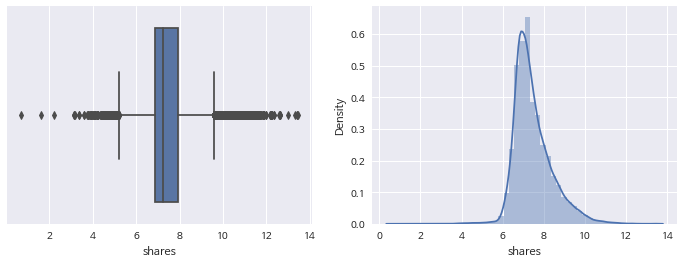

In [126]:
# 왼쪽으로 굉장히 치우쳐져 있으므로, 로그 변환을 통해 target distribution을 바꾸어 주었습니다. 
y = np.log1p(y)

# log transformation을 취한 target distribution 은 정규분포에 가까워졌음을 볼 수 있습니다. 
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(y, ax=ax1)
sns.distplot(y, ax=ax2)

## 2. Continuous Variables

In [134]:
# dummy variable 을 제외한 연속형 변수들 사이의 관계를 살펴보겠습니다. 
# dummy variable : year(2013, 2014년), month, day, title_onehot 

continuous = train.drop(list(X.columns[X.columns.str.contains("year|month|day|title_onehot")]), axis=1)

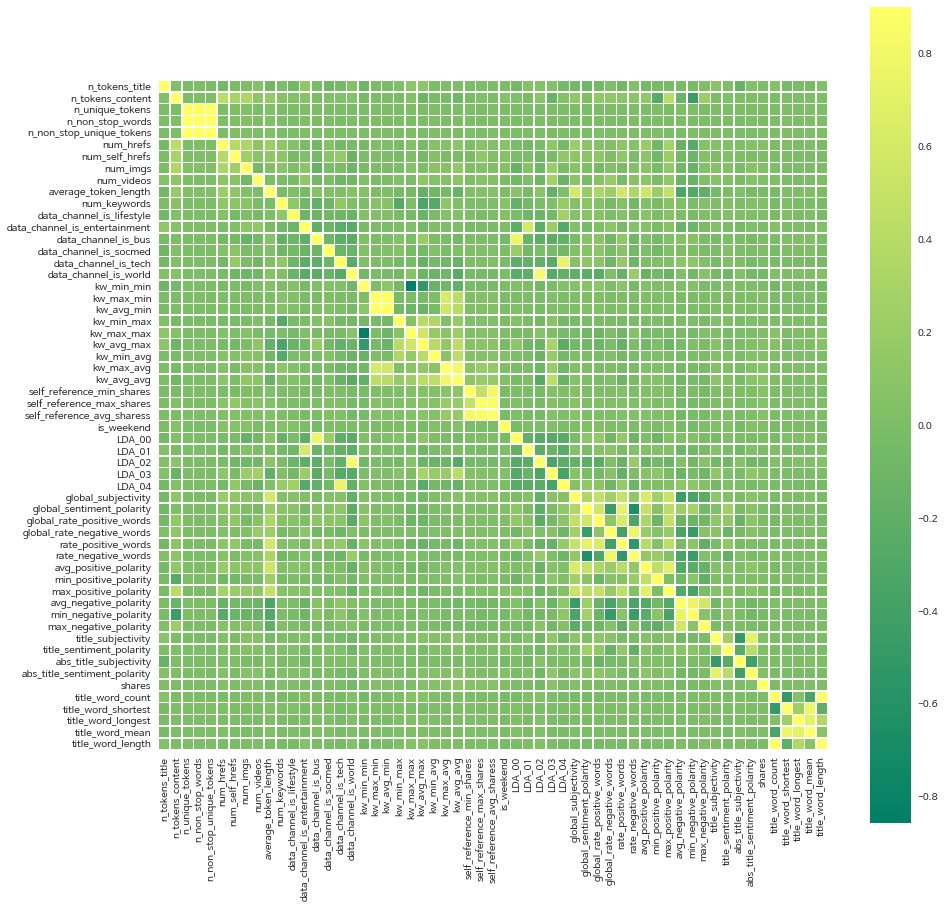

In [135]:
# Correlation
plt.subplots(figsize=(15,15))
sns.heatmap(continuous.corr(), vmax=0.9, linewidths=.5, cmap='summer', square=True)

In [139]:
# n_unique_tokens: Rate of unique words in the content
# n_non_stop_words: Rate of non-stop words in the content
# n_non_stop_unique_tokens: Rate of unique non-stop words in the content

continuous.corr()['n_unique_tokens'].sort_values(ascending=False)[:3]

n_unique_tokens             1.000000
n_non_stop_unique_tokens    0.999880
n_non_stop_words            0.999657
Name: n_unique_tokens, dtype: float64

In [141]:
continuous.corr()['title_word_count'].sort_values(ascending=False)[:3]

title_word_count     1.000000
title_word_length    0.890416
kw_max_max           0.057709
Name: title_word_count, dtype: float64

In [143]:
# keyword 관련 변수들은 모두 중요하다고 판단했기에, drop 하지 않기로 결정했습니다. 
continuous.corr()['kw_avg_min'].sort_values(ascending=False)[:3]

kw_avg_min    1.000000
kw_max_min    0.945992
kw_max_avg    0.569911
Name: kw_avg_min, dtype: float64

In [144]:
# 상관관계가 높은 변수들이 있으면 Regression Task 에서는 방해가 될 수 있다고 판단했습니다. 
# 따라서 corr >= 0.95 이상인 stop_words 관련 변수들을 제거하였습니다. 

train = train.drop(["n_non_stop_words", "n_non_stop_unique_tokens"], axis=1)
test = test.drop(["n_non_stop_words", "n_non_stop_unique_tokens"], axis=1)

print(train.shape, test.shape)

(31715, 158) (7929, 158)


In [149]:
import pickle

In [150]:
df = {
    "train" : train, "test" : test
}

In [152]:
# save
with open('data.pickle', 'wb') as f:
    pickle.dump(df, f)

# Modeling

```python 
# colab 환경에서 LightGBM gpu version을 설치해 사용했습니다. 

!git clone https://github.com/Microsoft/LightGBM
cd LightGBM
!mkdir build
!cmake -DUSE_GPU=1
!make -j$(nproc)
!sudo apt-get -y install python-pip
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
%cd /content/drive/MyDrive/LightGBM/python-package
!sudo python setup.py install
!pip3 install --upgrade scikit-learn==0.21.3

```

In [5]:
# load
with open('data.pickle', 'rb') as f:
    df = pickle.load(f)

In [81]:
train = df["train"]
test = df["test"]

print(train.shape, test.shape)

(31715, 158) (7929, 158)


In [84]:
X = train.drop(["shares"], axis=1)
y = train.shares

In [85]:
y = np.log1p(y)

In [86]:
# ensemble을 위해 train, validation set을 나누었습니다. 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=77)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(25372, 157) (6343, 157) (25372,) (6343,)


In [87]:
# 최종 예측 후 비교해 보아야 할 값 
X_test = test.drop(["shares"], axis=1)
y_test = test.shares     

print(X_test.shape, y_test.shape)

(7929, 157) (7929,)


In [42]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score

from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor, plot_importance
from catboost import CatBoostRegressor

from sklearn.model_selection import GridSearchCV

In [88]:
# Validation function을 설정해, cross-validation을 기반으로 parameter를 찾았습니다. 
# RMSE (root mean squared error) 값을 줄이는 방향으로 모델링을 진행합니다. 

n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=2020).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [148]:
def print_score(y_test, y_pred) : 

    # MSE 
    mse = mean_squared_error(y_test, y_pred)

    # MAE 
    mae = mean_absolute_error(y_test, y_pred)

    # RMSE
    rmse = np.sqrt(((y_pred - y_test) ** 2).mean())

    print("MSE  : ", mse)
    print("MAE  : ", mae)
    print("RMSE : ", rmse)

## 1. Ridge Regression 

In [89]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 1, 10, 15, 30]

for alpha in alphas: 
    ridge = make_pipeline(RobustScaler(), Ridge(alpha = alpha, random_state=2020))
    score = rmse_cv(ridge)
    print("(alpha = {}) Ridge score: {:.4f} ({:.4f})".format(alpha, score.mean(), score.std()))

(alpha = 0.0001) Ridge score: 0.8708 (0.0200)
(alpha = 0.0005) Ridge score: 0.8708 (0.0200)
(alpha = 0.001) Ridge score: 0.8708 (0.0200)
(alpha = 0.005) Ridge score: 0.8708 (0.0200)
(alpha = 0.01) Ridge score: 0.8708 (0.0200)
(alpha = 0.05) Ridge score: 0.8708 (0.0200)
(alpha = 1) Ridge score: 0.8708 (0.0201)
(alpha = 10) Ridge score: 0.8708 (0.0206)
(alpha = 15) Ridge score: 0.8709 (0.0209)
(alpha = 30) Ridge score: 0.8711 (0.0216)


In [90]:
ridge_model = Ridge(alpha = 0.05, random_state=2020)
ridge_model.fit(X_train, y_train)
ridge_model.score(X_val, y_val)

0.13319376643241176

In [91]:
# ensemble을 위한 결과 저장 
ridge_val = ridge_model.predict(X_val)

In [92]:
# ridge regression 결과 저장 
ridge_results = ridge_model.predict(X_test)

In [151]:
# validation set score 
print_score(y_val, ridge_val)

MSE  :  0.7671390461312065
MAE  :  0.6471181385768684
RMSE :  0.8758647419157871


## 2. Lasso Regression 

In [93]:
for alpha in alphas: 
    lasso = make_pipeline(RobustScaler(), Lasso(alpha = alpha, random_state=2020))
    score = rmse_cv(lasso)
    print("(alpha = {}) Lasso score: {:.4f} ({:.4f})".format(alpha, score.mean(), score.std()))

(alpha = 0.0001) Lasso score: 0.8694 (0.0186)
(alpha = 0.0005) Lasso score: 0.8681 (0.0175)
(alpha = 0.001) Lasso score: 0.8681 (0.0175)
(alpha = 0.005) Lasso score: 0.8705 (0.0168)
(alpha = 0.01) Lasso score: 0.8747 (0.0162)
(alpha = 0.05) Lasso score: 0.8942 (0.0152)
(alpha = 1) Lasso score: 0.9292 (0.0138)
(alpha = 10) Lasso score: 0.9292 (0.0138)
(alpha = 15) Lasso score: 0.9292 (0.0138)
(alpha = 30) Lasso score: 0.9292 (0.0138)


In [95]:
lasso_model = Lasso(alpha = 0.001, random_state=2020)
lasso_model.fit(X_train, y_train)
lasso_model.score(X_val, y_val)

0.13369337199188402

In [96]:
# ensemble을 위한 결과 저장 
lasso_val = lasso_model.predict(X_val)

In [97]:
# lasso regression 결과 저장 
lasso_results = lasso_model.predict(X_test)

In [152]:
# validation set score 
print_score(y_val, lasso_val)

MSE  :  0.7666968862602997
MAE  :  0.6463098606625738
RMSE :  0.8756122922048891


## 3. ElasticNet Regression

In [98]:
for alpha in alphas: 
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha = alpha, l1_ratio=.7, random_state=2020))
    score = rmse_cv(ENet)
    print("(alpha = {}) Elastic Net score: {:.4f} ({:.4f})".format(alpha, score.mean(), score.std()))

(alpha = 0.0001) Elastic Net score: 0.8697 (0.0189)
(alpha = 0.0005) Elastic Net score: 0.8682 (0.0176)
(alpha = 0.001) Elastic Net score: 0.8682 (0.0176)
(alpha = 0.005) Elastic Net score: 0.8692 (0.0167)
(alpha = 0.01) Elastic Net score: 0.8725 (0.0164)
(alpha = 0.05) Elastic Net score: 0.8900 (0.0150)
(alpha = 1) Elastic Net score: 0.9291 (0.0138)
(alpha = 10) Elastic Net score: 0.9292 (0.0138)
(alpha = 15) Elastic Net score: 0.9292 (0.0138)
(alpha = 30) Elastic Net score: 0.9292 (0.0138)


In [99]:
elnet_model = ElasticNet(alpha = 0.001, l1_ratio=.7, random_state=2020)
elnet_model.fit(X_train, y_train)
elnet_model.score(X_val, y_val)

0.1343277071554766

In [100]:
# ensemble을 위한 결과 저장 
elnet_val = elnet_model.predict(X_val)

In [101]:
# elasticNet regression 결과 저장 
elnet_results = elnet_model.predict(X_test)

In [153]:
# validation set score 
print_score(y_val, elnet_val)

MSE  :  0.766135488275974
MAE  :  0.6462364770751403
RMSE :  0.8752916589777229


## 4. AdaBoost Regressor

In [102]:
AdaBoost = AdaBoostRegressor(learning_rate=0.02, loss='linear', random_state = 2020, n_estimators=1000)

In [103]:
AdaBoost.fit(X_train, y_train)
AdaBoost.score(X_val, y_val)

-0.07479775698576896

In [104]:
# ensemble을 위한 결과 저장 
adaboost_val = AdaBoost.predict(X_val)

In [105]:
# AdaBoost regression 결과 저장 
adaboost_results = AdaBoost.predict(X_test)

In [154]:
# validation set score 
print_score(y_val, adaboost_val)

MSE  :  0.951215270666062
MAE  :  0.7869605128598038
RMSE :  0.9753026559310028


In [197]:
def feature_importance(X, model) : 
    feature_importance = pd.DataFrame({'feature' : X.columns, 
                                       'importance' : model.feature_importances_}).sort_values(by='importance', ascending=False)

    fig, ax = plt.subplots(figsize=(8,10))

    plot = sns.barplot(
                data = feature_importance[:30],
                x = "importance",
                y = "feature"
            )

    for p in plot.patches:
        x, y, width, height = p.get_bbox().bounds
        plot.text(width*1.01, y+height/2, width, va='center')

In [198]:
pd.DataFrame({'feature' : X_train.columns, 'importance' : AdaBoost.feature_importances_}).sort_values(by='importance', ascending=False)[:20]

,feature,importance
26,self_reference_avg_sharess,0.158172
22,kw_max_avg,0.145983
23,kw_avg_avg,0.112857
3,num_hrefs,0.080813
6,num_videos,0.079745
1,n_tokens_content,0.053867
8,num_keywords,0.031886
25,self_reference_max_shares,0.028972
24,self_reference_min_shares,0.028732
7,average_token_length,0.025869


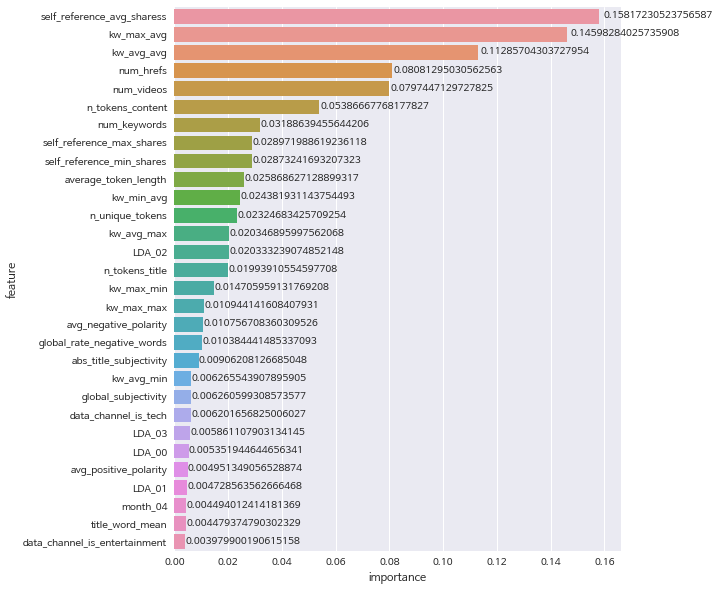

In [199]:
feature_importance(X_train, AdaBoost) 

## 5. GradientBoost Regressor

In [106]:
gboost_model = GradientBoostingRegressor(learning_rate=0.02, random_state = 2020, n_estimators=1000)
gboost_model.fit(X_train, y_train)
gboost_model.score(X_val, y_val)

0.1625792206719091

In [107]:
# ensemble을 위한 결과 저장 
gboost_val = gboost_model.predict(X_val)

In [108]:
# Gradient Boosting regression 결과 저장 
gboost_results = gboost_model.predict(X_test)

In [155]:
# validation set score 
print_score(y_val, gboost_val)

MSE  :  0.7411323926688299
MAE  :  0.6311578718939471
RMSE :  0.8608904649656831


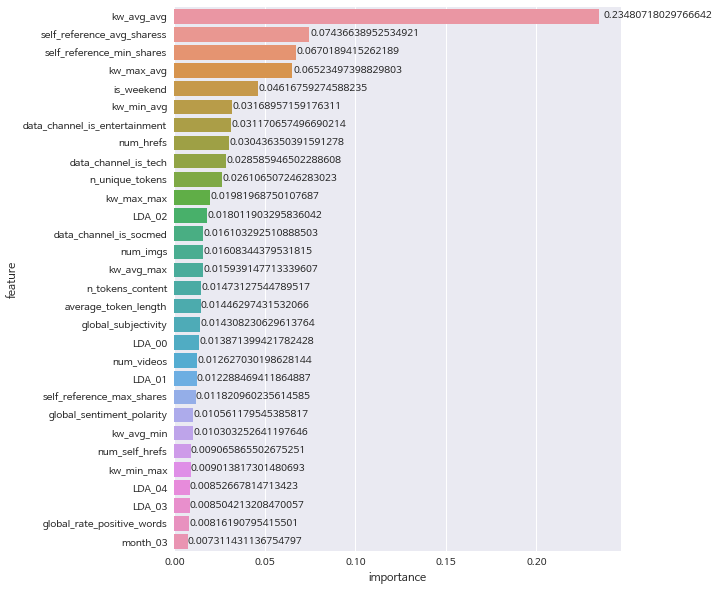

In [200]:
feature_importance(X_train, gboost_model)

## 6. LightGBM Regressor 

In [49]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [55]:
def lgbm_oof(X, y, params, cv_splits=5, epoch=10000):
  
    lgbm = make_pipeline(RobustScaler(), LGBMRegressor(**params))
    score = rmse_cv(lgbm)

    return score.mean()

In [56]:
def objective_lgbm(trial, X, y):
    
    params = {
        'num_leaves': int(trial.suggest_loguniform('num_leaves', 8, 64)),  
        'max_depth': trial.suggest_int('max_depth', 8, 64),       
        'learning_rate': trial.suggest_uniform('learning_rate', 0.001, 0.01),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 0.01, 1.0), 
        'reg_lambda': trial.suggest_uniform('reg_lambda', 0.01, 1.0), 
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),  
  
        'seed': 2020,
        'n_jobs': -1,
        'device_type' : 'gpu', 
        'objective': 'regression',
        'num_iterations': 10000,
        'metric': 'rmse',
        'importance_type': 'gain'
    }
    
    score = lgbm_oof(X, y, params, cv_splits=5, epoch=10000)
    return score

In [ ]:
%%time
lgbm_study = optuna.create_study()
lgbm_study.optimize(lambda x : objective_lgbm(x, X, y), timeout=1000, n_jobs=-1)
print(lgbm_study.best_params, lgbm_study.best_value)

***

In [109]:
lgbm_model = LGBMRegressor(learning_rate=0.02, n_estimators=1000, subsample=0.8, random_state=2020, device='gpu')

In [110]:
lgbm_model.fit(X_train, y_train)
lgbm_model.score(X_val, y_val)

0.17335660021463428

In [111]:
# ensemble을 위한 결과 저장 
lgbm_val = lgbm_model.predict(X_val)

In [112]:
# lgbm regression 결과 저장 
lgbm_results = lgbm_model.predict(X_test)

In [156]:
# validation set score 
print_score(y_val, lgbm_val)

MSE  :  0.7315942186894252
MAE  :  0.6287017313542173
RMSE :  0.8553328116525301


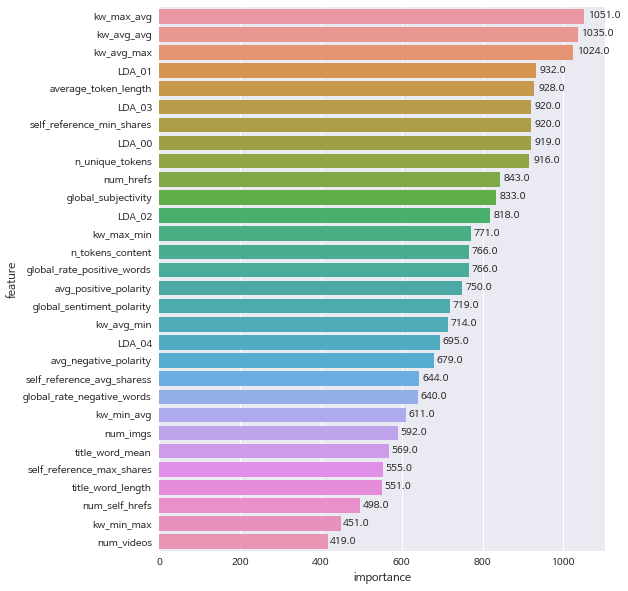

In [201]:
feature_importance(X_train, lgbm_model)

## 7. Xgboost Regressor 

In [113]:
xgboost_model = XGBRegressor(learning_rate=0.02, n_estimators=1000, subsample=0.8, random_state=2020)

In [114]:
xgboost_model.fit(X_train, y_train)
xgboost_model.score(X_val, y_val)

[19:02:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.1661591548156387

In [115]:
# ensemble을 위한 결과 저장 
xgboost_val = xgboost_model.predict(X_val)

In [116]:
# xgboost regression 결과 저장 
xgboost_results = xgboost_model.predict(X_test)

In [157]:
# validation set score 
print_score(y_val, xgboost_val)

MSE  :  0.7379640868146713
MAE  :  0.6301434910438778
RMSE :  0.8590483611617393


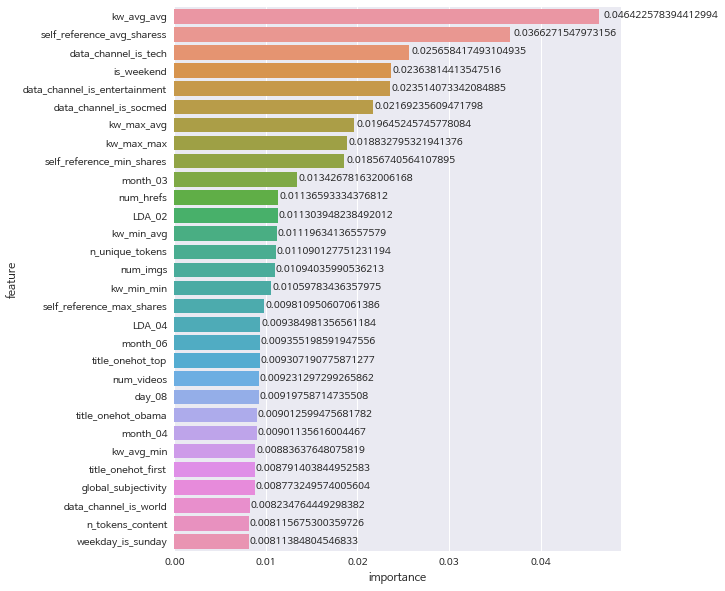

In [202]:
feature_importance(X_train, xgboost_model)

## 8. Catboost Regressor

In [117]:
catboost_model = CatBoostRegressor(learning_rate=0.02, n_estimators=1000, subsample=0.8, random_state=2020)

In [118]:
catboost_model.fit(X_train, y_train, verbose=False)
catboost_model.score(X_val, y_val)

0.17669217253381597

In [119]:
# ensemble을 위한 결과 저장 
catboost_val = catboost_model.predict(X_val)

In [120]:
# catboost regression 결과 저장 
catboost_results = catboost_model.predict(X_test)

In [158]:
# validation set score 
print_score(y_val, catboost_val)

MSE  :  0.7286421774279
MAE  :  0.6265705623731657
RMSE :  0.8536053991323515


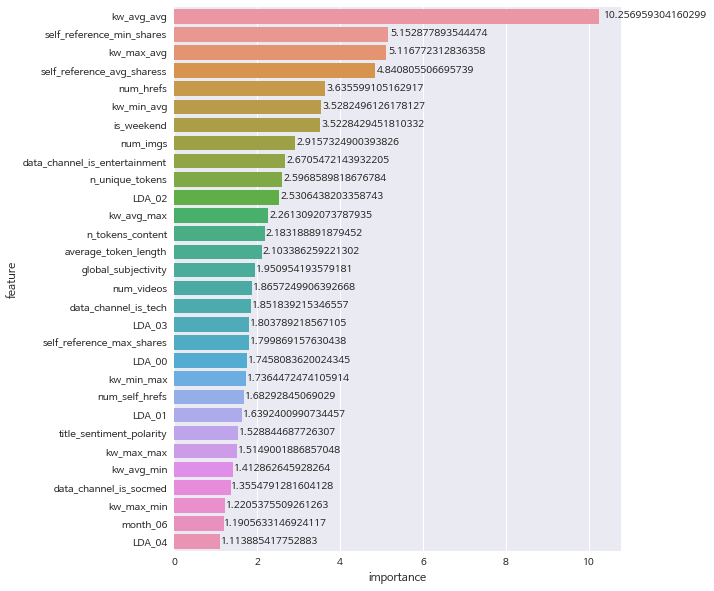

In [203]:
feature_importance(X_train, catboost_model)

## 9. RandomForest Regressor

In [121]:
RF = RandomForestRegressor(bootstrap=True, max_features='auto', n_estimators=1000, random_state=2020)

In [122]:
RF.fit(X_train, y_train)
RF.score(X_val, y_val)

0.14413183979265431

In [123]:
# ensemble을 위한 결과 저장 
rf_val = RF.predict(X_val)

In [124]:
# RandomForest regression 결과 저장 
rf_results = RF.predict(X_test)

In [159]:
# validation set score 
print_score(y_val, rf_val)

MSE  :  0.7574586552443597
MAE  :  0.642309979618942
RMSE :  0.8703210070108384


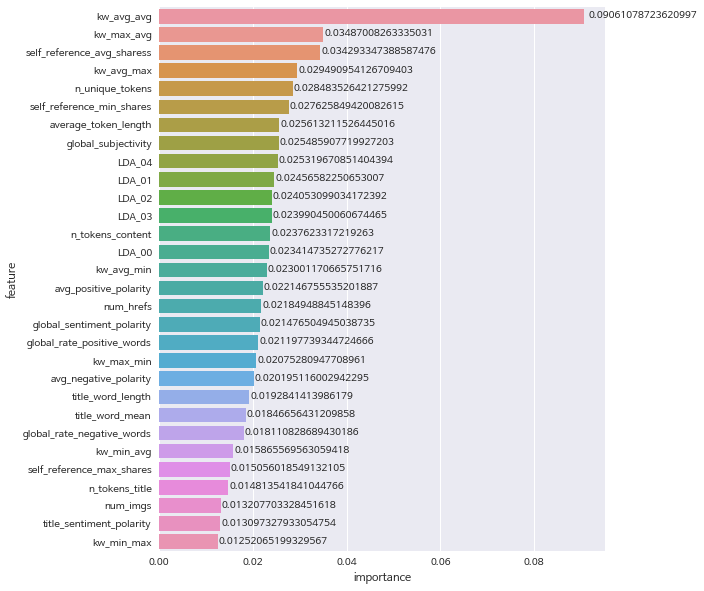

In [204]:
feature_importance(X_train, RF)

# Ensemble

In [133]:
from sklearn.linear_model import LinearRegression

In [126]:
ensemble_train = pd.DataFrame({
    'ridge' : ridge_val , 
    'lasso' : lasso_val , 
    'elnet' : elnet_val , 
#    'adaboost' : adaboost_val , 
    'gradientboost' : gboost_val, 
    'lightgbm' : lgbm_val , 
    'xgboost' : xgboost_val , 
    'catboost' : catboost_val , 
    'y' : y_val     # 실제값 
})

In [127]:
ensemble_test = pd.DataFrame({
    'ridge' : ridge_results , 
    'lasso' : lasso_results , 
    'elnet' : elnet_results , 
 #   'adaboost' : adaboost_results , 
    'gradientboost' : gboost_results, 
    'lightgbm' : lgbm_results , 
    'xgboost' : xgboost_results , 
    'catboost' : catboost_results , 
    'y' : np.log1p(y_test)
})

In [128]:
ensemble_train_X = ensemble_train.drop(["y"], axis=1)
ensemble_train_y = ensemble_train.y

ensemble_test_X = ensemble_test.drop(["y"], axis=1)
ensemble_test_y = ensemble_test.y

In [185]:
print(ensemble_train_X.shape, ensemble_train_y.shape, ensemble_test_X.shape, ensemble_test_y.shape)

(6343, 8) (6343,) (7929, 8) (7929,)


## 1. 절편 없는 Linear Regression Coef 기반 Ensemble 

In [129]:
lr1 = LinearRegression(fit_intercept=False)

In [130]:
lr1.fit(ensemble_train_X, ensemble_train_y)
lr1.score(ensemble_test_X, ensemble_test_y)

0.17396009250222078

In [131]:
print(lr1.coef_) # 추정된 회귀계수

[-0.05458019 -2.36110632  2.51396131 -0.08281321 -0.28708506  0.51291136
 -0.46731054  1.22920877]


In [164]:
final_pred1 = lr1.predict(ensemble_test_X)

In [165]:
# Final score 
print_score(np.log1p(y_test), final_pred1)

MSE  :  0.7020026889064402
MAE  :  0.6179483701808646
RMSE :  0.8378560072628468


In [169]:
# log transformation 을 하였으므로 다시 지수함수를 취해 변환해 주었습니다. 
final_pred_1 = np.expm1(final_pred1)

In [170]:
# Final score 
print_score(y_test, final_pred_1)

MSE  :  135475225.48919177
MAE  :  2294.3162242917047
RMSE :  11639.38252181754


## 2. Feature selection을 통해 유의미한 모델만 결과에 넣는 Ensemble 
* 캐글에서 참고했습니다. (링크 : https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression)
* RFE : Backward 방식중 하나로, 모든 변수를 우선 다 포함시킨 후 반복해서 학습을 진행하면서 중요도가 낮은 변수를 하나씩 제거하는 방식

In [171]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [175]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 77)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 10))}]


# step-3: perform grid search
# 3.1 specify model
lr2 = LinearRegression()
lr2.fit(ensemble_train_X, ensemble_train_y)
rfe = RFE(lr2)             

# 3.2 call GridSearchCV()
lr2_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
lr2_cv.fit(ensemble_train_X, ensemble_train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [176]:
# cv results
cv_results = pd.DataFrame(lr2_cv.cv_results_)

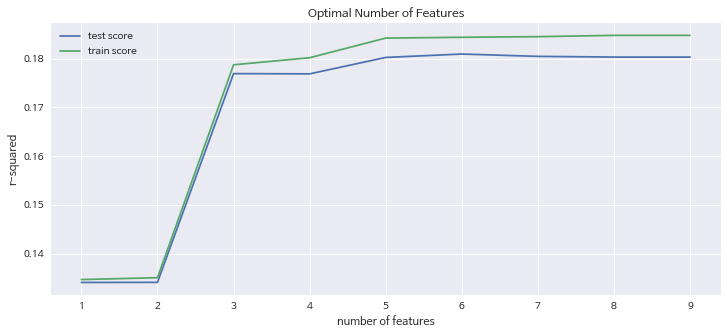

In [177]:
# plotting cv results
plt.figure(figsize=(12,5))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [178]:
# final model
n_features_optimal = 5

lr3 = LinearRegression()
lr3.fit(ensemble_train_X, ensemble_train_y)

rfe = RFE(lr3, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(ensemble_train_X, ensemble_train_y)

In [179]:
rfe.support_ 

array([False,  True,  True, False, False,  True,  True,  True])

In [180]:
print(rfe.estimator_.coef_)
print(rfe.estimator_.intercept_)

[-2.21754929  2.37022703  0.51386824 -0.76944091  1.16392311]
-0.4624628691157442


In [181]:
final_pred2 = rfe.predict(ensemble_test_X)

In [182]:
# Final score 
print_score(np.log1p(y_test), final_pred2)

MSE  :  0.7026949137577752
MAE  :  0.6189680729671678
RMSE :  0.838268998447261


In [183]:
# log transformation 을 하였으므로 다시 지수함수를 취해 변환해 주었습니다. 
final_pred_2 = np.expm1(final_pred2)

In [184]:
# Final score 
print_score(y_test, final_pred_2)

MSE  :  135358009.99691108
MAE  :  2296.976220897796
RMSE :  11634.34613534043
